In [1]:
import numpy as np
import autograd.numpy as anp

import matplotlib.pyplot as plt

from functools import partial

from utils import (
    cauchy_distribution,
    standard_cauchy,
    log_likelihood,
    newton_raphson
)

In [2]:
%matplotlib inline

### Problems

#### Q 2.1

The following data are an i.i.d. sample from a Cauchy(θ, 1) distribution: 1.77, −0.23,
2.76, 3.80, 3.47, 56.75, −1.34, 4.24, −2.44, 3.29, 3.71, −2.40, 4.53, −0.07, −1.05,
−13.87, −2.53, −1.75, 0.27, 43.21

In [3]:
data = [1.77, -0.23, 2.76, 3.80, 3.47, 56.75, -1.34, 4.24, -2.44, 3.29, 3.71, -2.40, 4.53, -0.07, -1.05, 
        -13.87, -2.53, -1.75, 0.27, 43.21]

a) graph log-likelihood function

In [4]:
observations = np.linspace(-5, 5)
cauchy = [cauchy_distribution(x, loc=0, scale=1) for x in observations]

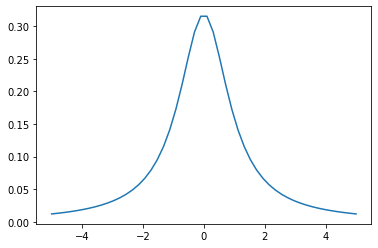

In [5]:
plt.plot(observations, cauchy)

In [6]:
cauchy_log_likelihood = log_likelihood(cauchy_distribution, data, {'scale': 1})
loc_values = np.linspace(-20, 20)
cauchy_log_likelihood_vals = [cauchy_log_likelihood(loc) for loc in loc_values]

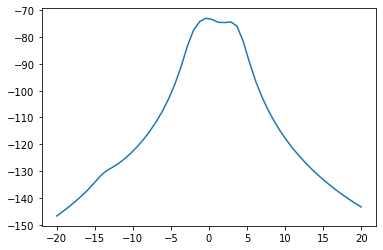

In [7]:
plt.plot(loc_values, cauchy_log_likelihood_vals)

In [8]:
max_idx = np.argmax(cauchy_log_likelihood_vals)  # Note: argmax gives index of first appearance
max_idx

24

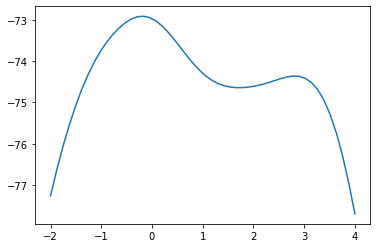

In [9]:
# Zoom into peak
plt.plot(np.linspace(-2,4),[cauchy_log_likelihood(x) for x in np.linspace(-2,4)])

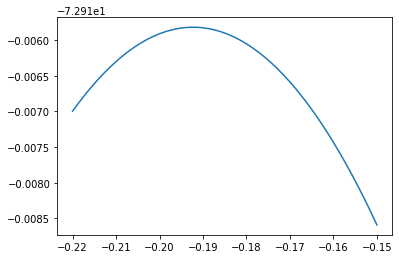

In [10]:
# Zoom EVEN MORE into peak
plt.plot(np.linspace(-0.22,-0.15),[cauchy_log_likelihood(x) for x in np.linspace(-0.22,-0.15)])

In [11]:
max_log_idx = np.argmax(cauchy_log_likelihood_vals)
max_log_idx
max_log_idx == max_idx
# evidence that maximizing log-likelihood also maximizes likelihood 

True

#### Test autograd can handle python partial functions

In [12]:
# Newton Raphson
import autograd.numpy as anp
from autograd import grad

def trig(x,y):
    return anp.sin(x) * y


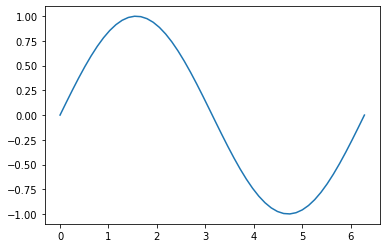

In [13]:
trig(1,1)
zz = partial(trig, y=1)
x2 = np.linspace(0, 2*np.pi)
y2 = list(map(zz, x2))
plt.plot(x2, y2)

In [14]:
grad_zz = grad(zz)

In [15]:
y3 = list(map(grad_zz, x2))

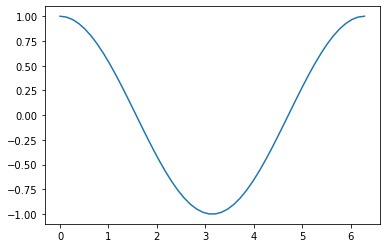

In [16]:
plt.plot(x2, y3)

### Newton-Raphson using autograd

In [30]:
# Use newton method from
from scipy.optimize import newton

scipy_x0 = newton(
    func=grad(cauchy_log_likelihood),
    x0 =-1, 
    fprime=grad(grad(cauchy_log_likelihood)),
    args=(), 
    tol=1.48e-03,
    maxiter=1000,
    fprime2=None
)
print(scipy_x0)


-0.19228646762465865


In [31]:
custom_x0 = newton_raphson(
    func=grad(cauchy_log_likelihood),
    start_guess=-1, 
    max_iters=10,
    enable_logging=False
)

print(custom_x0)

-0.19228646762465865


In [29]:
assert abs(custom_x0 - scipy_x0) < 1e-8, "handwritten Newton-Raphson does not agree with that of scipy"